# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [124]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [109]:
#cities=cities[0:5]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [125]:

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=e28123602e55d0e85b72074da41d6f3f&units=imperial&q=


In [127]:
#cities

In [128]:
#pprint.pprint(weather_json)


In [129]:
# set up lists to hold reponse info
city_name=[]
lat = []
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
print('----------------------------')
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print('Extracting Data for ' + city)
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print('City not found.  Skipping...')

Beginning Data Retrieval
----------------------------
Extracting Data for ilulissat
Extracting Data for north bend
Extracting Data for dibaya
City not found.  Skipping...
Extracting Data for ondjiva
Extracting Data for east london
Extracting Data for krutikha
Extracting Data for punta arenas
Extracting Data for booue
Extracting Data for ushuaia
Extracting Data for prince george
Extracting Data for broken hill
Extracting Data for elko
Extracting Data for hilo
Extracting Data for provideniya
Extracting Data for pevek
Extracting Data for norman wells
Extracting Data for kuytun
Extracting Data for anadyr
Extracting Data for bonthe
Extracting Data for bengkulu
Extracting Data for butaritari
Extracting Data for galesong
Extracting Data for rikitea
Extracting Data for airai
Extracting Data for barentsburg
City not found.  Skipping...
Extracting Data for faanui
Extracting Data for lethem
Extracting Data for saldanha
Extracting Data for guerrero negro
Extracting Data for shingu
Extracting Data 

Extracting Data for grindavik
Extracting Data for sept-iles
Extracting Data for mocorito
Extracting Data for nicoya
Extracting Data for ondangwa
Extracting Data for klaksvik
Extracting Data for bubaque
Extracting Data for adamas
Extracting Data for laguna
Extracting Data for trelew
Extracting Data for hithadhoo
Extracting Data for chapais
Extracting Data for riacho de santana
Extracting Data for hasaki
Extracting Data for megion
Extracting Data for sembakung
Extracting Data for finschhafen
Extracting Data for ostrovnoy
Extracting Data for flinders
Extracting Data for nakhon phanom
Extracting Data for pitimbu
Extracting Data for ancud
Extracting Data for udarnyy
Extracting Data for toamasina
Extracting Data for llanes
Extracting Data for yar-sale
Extracting Data for axim
Extracting Data for adrar
Extracting Data for maltahohe
Extracting Data for eureka
Extracting Data for san jeronimo
Extracting Data for prainha
Extracting Data for aserrio de gariche
Extracting Data for belomorsk
Extrac

Extracting Data for lexington park
Extracting Data for seydi
Extracting Data for vao
Extracting Data for skagen
Extracting Data for yunyang
Extracting Data for nalut
Extracting Data for araouane
Extracting Data for sistranda
Extracting Data for mayo
Extracting Data for lazaro cardenas
Extracting Data for gilbues
Extracting Data for nyurba
Extracting Data for mahon
Extracting Data for iskateley
Extracting Data for richards bay
Extracting Data for havre-saint-pierre
Extracting Data for kitimat
Extracting Data for uyemskiy
Extracting Data for anklesvar
City not found.  Skipping...
Extracting Data for nanakuli
Extracting Data for lata
Extracting Data for perth
Extracting Data for conceicao do araguaia
Extracting Data for serebryansk
Extracting Data for ugoofaaru
Extracting Data for nagybaracska
Extracting Data for san juan bautista
Extracting Data for javanrud
Extracting Data for cerritos
Extracting Data for borama
City not found.  Skipping...
Extracting Data for waingapu
Extracting Data f

In [188]:
#print(len(city_name))
#print(len(lat))
#print(len(lng))
#print(len(max_temp))
#print(len(humidity))
#print(len(cloudiness))
#print(len(wind_speed))
#print(len(country))
#print(len(date))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [132]:
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lng": lng,
    "max_temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "country": country,
    "date": date,
}
weather_data = pd.DataFrame(weather_dict)

In [133]:
weather_data

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Ilulissat,69.2167,-51.1000,21.20,68,20,5.75,GL,1614940588
1,North Bend,43.4065,-124.2243,53.60,54,90,13.80,US,1614940467
2,Ondjiva,-17.0667,15.7333,87.80,30,20,5.75,AO,1614940588
3,East London,-33.0153,27.9116,75.20,60,20,16.11,ZA,1614940588
4,Krutikha,53.9599,81.2093,24.04,83,81,17.72,RU,1614940589
...,...,...,...,...,...,...,...,...,...
566,Payo,-3.7508,103.6372,79.97,92,90,2.46,ID,1614940683
567,Atambua,-9.1061,124.8925,75.96,90,70,1.90,ID,1614940684
568,Kampong Thom,12.7111,104.8887,92.14,29,0,5.79,KH,1614940684
569,Saint Anthony,45.0205,-93.2180,35.60,69,90,2.55,US,1614940684


In [134]:
#inspect data
weather_data.describe()

,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,18.568742,18.811158,55.369475,67.155867,46.302977,8.253240,1.614941e+09
std,33.712030,88.540199,31.082794,24.702338,38.869836,5.240855,7.335810e+01
min,-54.800000,-175.200000,-33.450000,6.000000,0.000000,0.200000,1.614940e+09
25%,-9.016350,-58.088650,33.405000,54.500000,1.000000,4.000000,1.614941e+09
50%,20.894700,20.916700,64.720000,73.000000,40.000000,7.340000,1.614941e+09
75%,46.301650,94.750000,78.965000,87.000000,86.000000,11.500000,1.614941e+09
max,78.218600,178.416700,102.200000,100.000000,100.000000,27.470000,1.614941e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [138]:
# check for humidity greater than 100%
clean_city_data = weather_data[weather_data['humidity'] <= 100]

In [136]:
#  Get the indices of cities that have humidity over 100%.


In [139]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Ilulissat,69.2167,-51.1000,21.20,68,20,5.75,GL,1614940588
1,North Bend,43.4065,-124.2243,53.60,54,90,13.80,US,1614940467
2,Ondjiva,-17.0667,15.7333,87.80,30,20,5.75,AO,1614940588
3,East London,-33.0153,27.9116,75.20,60,20,16.11,ZA,1614940588
4,Krutikha,53.9599,81.2093,24.04,83,81,17.72,RU,1614940589


In [187]:
# Export dataframe to .csv file
clean_city_data.to_csv("Output/city_weather_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

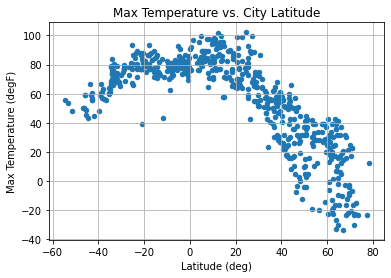

In [147]:
temp_scatter = clean_city_data.plot.scatter(x='lat', y='max_temp', title= "Max Temperature vs. City Latitude");
temp_scatter.set_xlabel("Latitude (deg)")
temp_scatter.set_ylabel("Max Temperature (degF)")
temp_scatter.grid()

This plot displays a scatter of city maximum temperature vs. latitude.

## Latitude vs. Humidity Plot

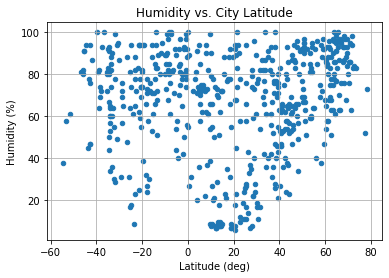

In [149]:
hum_scatter = clean_city_data.plot.scatter(x='lat', y='humidity', title= "Humidity vs. City Latitude");
hum_scatter.set_xlabel("Latitude (deg)")
hum_scatter.set_ylabel("Humidity (%)")
hum_scatter.grid()

This plot displays a scatter of city humidity vs. latitude.

## Latitude vs. Cloudiness Plot

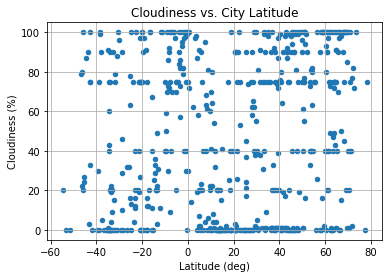

In [150]:
cloud_scatter = clean_city_data.plot.scatter(x='lat', y='cloudiness', title= "Cloudiness vs. City Latitude");
cloud_scatter.set_xlabel("Latitude (deg)")
cloud_scatter.set_ylabel("Cloudiness (%)")
cloud_scatter.grid()

This plot displays a scatter of city cloudiness vs. latitude.

## Latitude vs. Wind Speed Plot

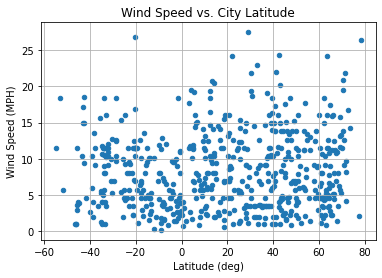

In [153]:
wind_scatter = clean_city_data.plot.scatter(x='lat', y='wind_speed', title= "Wind Speed vs. City Latitude");
wind_scatter.set_xlabel("Latitude (deg)")
wind_scatter.set_ylabel("Wind Speed (MPH)")
wind_scatter.grid()

This plot displays a scatter of city wind speeds vs. latitude.

## Linear Regression

In [158]:
north_city_data=clean_city_data[clean_city_data['lat'] > 0] 
#print(north_city_data['lat'].min())
south_city_data=clean_city_data[clean_city_data['lat'] <= 0] 
#print(south_city_data['lat'].max())

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R^2 value is: 0.7671225301444137


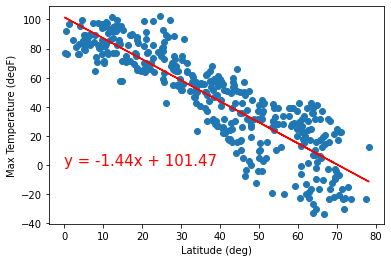

In [173]:
x_values = north_city_data['lat']
y_values = north_city_data['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude (deg)")
plt.ylabel("Max Temperature (degF)")
print('The R value is: ' + str(rvalue))
print('The R^2 value is: ' + str(rvalue**2))
plt.show()

For the northern hemisphere max temperatures, there seems to be a clear inverse correlation between latitude and max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R value is: 0.6364241806381608
The R^2 value is: 0.40503573770095425


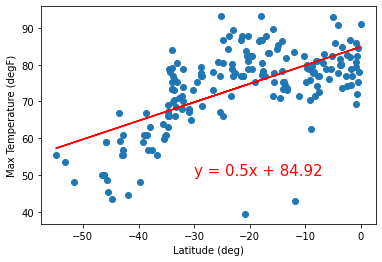

In [176]:
x_values = south_city_data['lat']
y_values = south_city_data['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Latitude (deg)")
plt.ylabel("Max Temperature (degF)")
print('The R value is: ' + str(rvalue))
print('The R^2 value is: ' + str(rvalue**2))
plt.show()

The southern hemisphere max temperature shows marginal correlation with latitude.  As shown in the plot, there are a few outliers that could be cleaned, and resampling (i.e. bootstrapping) the data set can yield a more representative sampling of the dataset from which a more confident conclusion can be made.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R value is: 0.4213927345568427
The R^2 value is: 0.17757183673729368


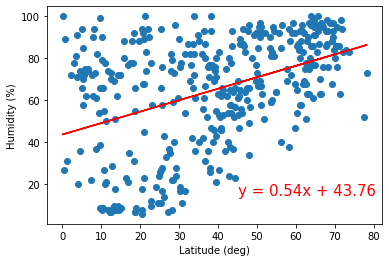

In [177]:
x_values = north_city_data['lat']
y_values = north_city_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
print('The R value is: ' + str(rvalue))
print('The R^2 value is: ' + str(rvalue**2))
plt.show()

For the northern hemisphere, there is very little correlation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R value is: 0.13595329450429355
The R^2 value is: 0.018483298286571175


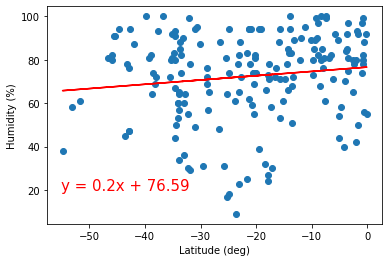

In [178]:
x_values = south_city_data['lat']
y_values = south_city_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
print('The R value is: ' + str(rvalue))
print('The R^2 value is: ' + str(rvalue**2))
plt.show()

For the southern hemisphere, there is very little correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R value is: 0.3121621341806498
The R^2 value is: 0.09744519801621801


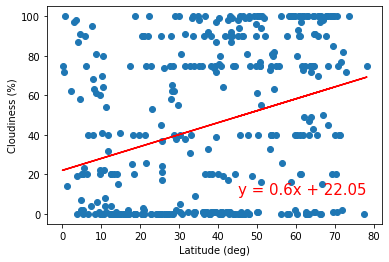

In [180]:
x_values = north_city_data['lat']
y_values = north_city_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
print('The R value is: ' + str(rvalue))
print('The R^2 value is: ' + str(rvalue**2))
plt.show()

For the northern hemisphere, there is very little correlation between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R value is: 0.3223811541962872
The R^2 value is: 0.10392960858093031


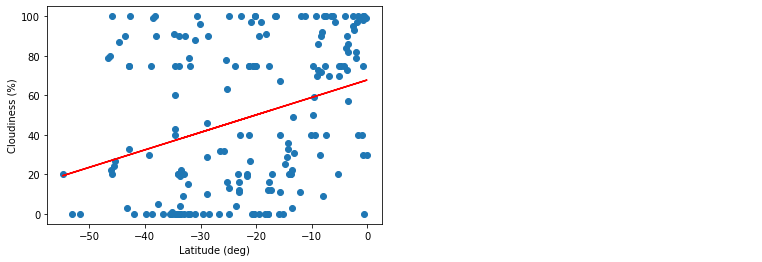

In [181]:
x_values = south_city_data['lat']
y_values = south_city_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
print('The R value is: ' + str(rvalue))
print('The R^2 value is: ' + str(rvalue**2))
plt.show()

For the southern hemisphere, there is very little correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R value is: 0.024103228543184446
The R^2 value is: 0.0005809656262049814


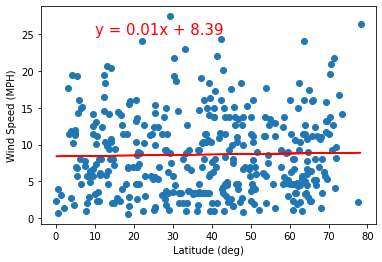

In [183]:
x_values = north_city_data['lat']
y_values = north_city_data['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (MPH)")
print('The R value is: ' + str(rvalue))
print('The R^2 value is: ' + str(rvalue**2))
plt.show()

For the northern hemisphere, there is very little correlation between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R value is: -0.2440900842655118
The R^2 value is: 0.05957996923674465


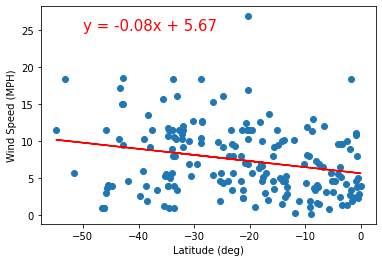

In [185]:
x_values = south_city_data['lat']
y_values = south_city_data['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (MPH)")
print('The R value is: ' + str(rvalue))
print('The R^2 value is: ' + str(rvalue**2))
plt.show()

For the southern hemisphere, there is very little correlation between latitude and wind speed.